Word Co-occurence Matrix
========================
Given a list of sentences and a window size to define co-occurrence, we can work out a symmetric matrix that record the co-occurence frequency between word pairs. Let's store it as a pandas data frame, so we can use the words as column names.

Below is a plain Python implementation that does not rely on any NLP packages. 

In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd

## Define a co-occurence function 

The function takes in a list of sentences and an integer that specifies the size of the window, then return a pandas data frame with word-pair co-occurence frequency.

In [3]:
def co_occurrence(sentences, window_size):
    d = defaultdict(int)
    vocab = set()
    for text in sentences:
        # preprocessing (use tokenizer instead)
        text = text.lower().split()
        # iterate over the sentence
        for i in range(len(text)):
            token = text[i]
            vocab.add(token)  # add to vocab
            next_token = text[i+1 : i+1+window_size]
            for t in next_token:
                key = tuple( sorted([t, token]) )
                d[key] += 1
    
    # formulate the dictionary into dataframe
    vocab = sorted(vocab) # sort vocab
    df = pd.DataFrame(data=np.zeros((len(vocab), len(vocab)), dtype=np.int16),
                      index=vocab,
                      columns=vocab)
    for key, value in d.items():
        df.at[key[0], key[1]] = value
        df.at[key[1], key[0]] = value
    return df

## Load Data and call function

In [4]:
text = ["It was the best of times",
"it was the worst of times",
"it was the age of wisdom",
"it was the age of foolishness"]

df = co_occurrence(text, 20) 
df

,age,best,foolishness,it,of,the,times,was,wisdom,worst
age,0,0,1,2,2,2,0,2,1,0
best,0,0,0,1,1,1,1,1,0,0
foolishness,1,0,0,1,1,1,0,1,0,0
it,2,1,1,0,4,4,2,4,1,1
of,2,1,1,4,0,4,2,4,1,1
the,2,1,1,4,4,0,2,4,1,1
times,0,1,0,2,2,2,0,2,0,1
was,2,1,1,4,4,4,2,0,1,1
wisdom,1,0,0,1,1,1,0,1,0,0
worst,0,0,0,1,1,1,1,1,0,0


Let's take the second sentence for example, `text[1]`, how many tokens are in this sentence? 

In [15]:
len(text[1])

25

Why? To work out the number of tokens without the aid of a tokeniser, we need to at least do the split. In this case, we also convert all to lower case. 

:::{tip}
tokenized_text = text[1].lower().split())
:::

Work out the number of tokens now.

## Work out cosine similarity using pyTorch

Note there are plenty of built-in functions for working out how close a pair of words is, using the various similarity (cosine similarity) or distance measures (L1 norm - manhattan/city block distance; L2 norm - euclidean/direct line distance) from a word co-ocurrence matrix. You can also code it yourself without relying on a package. 

Here we have an implementation using pyTorch built-in functions here to give you an early glimpse of how pyTorch works.

In [5]:
import torch
from torch.nn import functional as F

# Convert a pandas data frame values to a torch tensor
matrix = torch.as_tensor(df.values).float()

# Buit-in torch distrance measures
# Use the code below to replace the F.cosine_similarity 
# manhattan_dist = torch.cdist(matrix[i], matrix[j], p=1)
# euclidean_dist = torch.cdist(matrix[i], matrix[j], p=2)

dim = matrix.shape 
nrows = dim[0] 

# Initialise a torch tensor to keep the cosine similarities
cos_sims = torch.zeros(nrows, nrows) 
for i in range(nrows):
    for j in range(nrows):
        cos_sims[i,j] = F.cosine_similarity(matrix[i],
                                       matrix[j], 
                                       dim=0)
cos_sims       


tensor([[1.0000, 0.8433, 0.8433, 0.7912, 0.7912, 0.7912, 0.8889, 0.7912, 0.8433,
         0.8433],
        [0.8433, 1.0000, 0.8000, 0.8083, 0.8083, 0.8083, 0.8433, 0.8083, 0.8000,
         1.0000],
        [0.8433, 0.8000, 1.0000, 0.8083, 0.8083, 0.8083, 0.8433, 0.8083, 1.0000,
         0.8000],
        [0.7912, 0.8083, 0.8083, 1.0000, 0.7333, 0.7333, 0.7912, 0.7333, 0.8083,
         0.8083],
        [0.7912, 0.8083, 0.8083, 0.7333, 1.0000, 0.7333, 0.7912, 0.7333, 0.8083,
         0.8083],
        [0.7912, 0.8083, 0.8083, 0.7333, 0.7333, 1.0000, 0.7912, 0.7333, 0.8083,
         0.8083],
        [0.8889, 0.8433, 0.8433, 0.7912, 0.7912, 0.7912, 1.0000, 0.7912, 0.8433,
         0.8433],
        [0.7912, 0.8083, 0.8083, 0.7333, 0.7333, 0.7333, 0.7912, 1.0000, 0.8083,
         0.8083],
        [0.8433, 0.8000, 1.0000, 0.8083, 0.8083, 0.8083, 0.8433, 0.8083, 1.0000,
         0.8000],
        [0.8433, 1.0000, 0.8000, 0.8083, 0.8083, 0.8083, 0.8433, 0.8083, 0.8000,
         1.0000]])

## Visualising the matrix

C:\Users\wei\AppData\Local\Temp/ipykernel_17332/2201382337.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


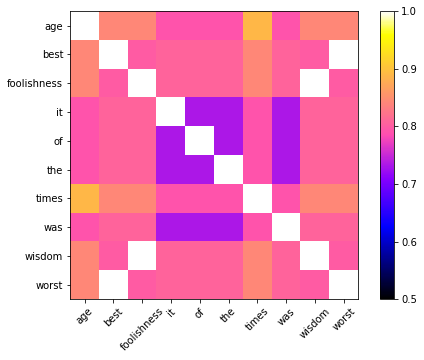

In [7]:
import matplotlib.pyplot as plt

labels = (df.columns)
plt.figure()
plt.axes([0, 0, 1, 1])
plt.imshow(cos_sims, interpolation='nearest', 
          cmap=plt.cm.gnuplot2, vmin=0.5)
plt.xticks(range(nrows), labels, rotation=45)
plt.yticks(range(nrows), labels)
plt.colorbar()
plt.tight_layout()
plt.show()

:::{admonition} You Turn
Implement PPMI (positive point-wise mutual information), and populate the word co-ocurrence matrix above with PPMI values.
:::